倉庫布置圖：
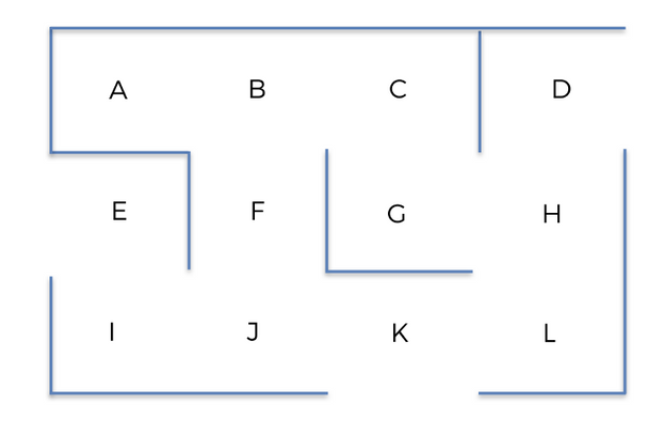

In [1]:
import numpy as np


In [2]:
location_to_state = {'A': 0,
                     'B': 1,
                     'C': 2,
                     'D': 3,
                     'E': 4,
                     'F': 5,
                     'G': 6,
                     'H': 7,
                     'I': 8,
                     'J': 9,
                     'K': 10,
                     'L': 11}

In [3]:
actions = [0,1,2,3,4,5,6,7,8,9,10,11]


In [4]:
#定義行動限制，假設G點有最高優先度, 故獎勵設為1000
R = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0, 0, 1000, 1, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]])

In [15]:
gamma = 0.75
alpha = 0.9
Q = np.array(np.zeros([12,12]))

for i in range(1000):
    current_state = np.random.randint(0, 12)
    playable_actions = []
    for j in range(12):
        if R[current_state, j] > 0:
            playable_actions.append(j)
    next_state = np.random.choice(playable_actions)
    TD = R[current_state, next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])] - Q[current_state, next_state]
    Q[current_state, next_state] = Q[current_state, next_state] + alpha*TD

In [16]:
import pandas as pd

q_values = pd.DataFrame(Q, columns=[location for location in location_to_state])
s = q_values.round().style.background_gradient(cmap='GnBu')
s

,A,B,C,D,E,F,G,H,I,J,K,L
0,0.000000,1682.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1262.000000,0.000000,2241.000000,0.000000,0.000000,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,1682.000000,0.000000,0.000000,0.000000,0.000000,2987.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2241.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,707.000000,0.000000,0.000000,0.000000
5,0.000000,1682.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,943.000000,0.000000,0.000000
6,0.000000,0.000000,2241.000000,0.000000,0.000000,0.000000,3993.000000,2238.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,1682.000000,0.000000,0.000000,2987.000000,0.000000,0.000000,0.000000,0.000000,1680.000000
8,0.000000,0.000000,0.000000,0.000000,531.000000,0.000000,0.000000,0.000000,0.000000,943.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,1262.000000,0.000000,0.000000,707.000000,0.000000,1251.000000,0.000000


In [17]:
R = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]])

In [18]:
state_to_location = {state: location for location, 
                     state in location_to_state.items()}
state_to_location            

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L'}

In [19]:
def route(starting_location, ending_location):
    ending_state = location_to_state[ending_location]
    
    R_new = np.copy(R)
    R_new[ending_state, ending_state] = 1000
    Q = np.array(np.zeros([12,12]))
    for i in range(1000):
        current_state = np.random.randint(0,12)
        playable_actions = []
        for j in range(12):
            if R_new[current_state, j] > 0:
                playable_actions.append(j)
        next_state = np.random.choice(playable_actions)
        TD = R_new[current_state, next_state] + gamma * \
            Q[next_state, np.argmax(Q[next_state,])] - Q[current_state, next_state]
        Q[current_state, next_state] = Q[current_state, next_state] + alpha * TD
    route = [starting_location]
    next_location = starting_location
    while (next_location != ending_location):
        starting_state = location_to_state[starting_location]
        next_state = np.argmax(Q[starting_state,])
        next_location = state_to_location[next_state]
        route.append(next_location)
        starting_location = next_location
    return route


In [20]:
route('E', 'G')


['E', 'I', 'J', 'F', 'B', 'C', 'G']

In [21]:
route('A', 'K')


['A', 'B', 'F', 'J', 'K']

In [22]:
def best_route(starting_location, intermediary_location, ending_location):
    # 3 個點的路由 = 2 個點的路由 + 2 個點的路由
    return route(starting_location, intermediary_location) + route(intermediary_location, ending_location)[1:]

In [23]:
best_route('E', 'K', 'G')


['E', 'I', 'J', 'K', 'L', 'H', 'G']

In [25]:
initial = "A" 
intermediary = "G" 
final = "K" 
best = best_route(initial, intermediary, final)
print('最佳路由: ')
print(*best, sep=', ')

最佳路由: 
A, B, C, G, H, L, K
